Data visualization and cleaning of Quantitative analysis final project dataset

# Data visualization and cleaning of Quantitative analysis final project dataset

Import and heatmap to see the overall correlations

shape:  (1219, 28)


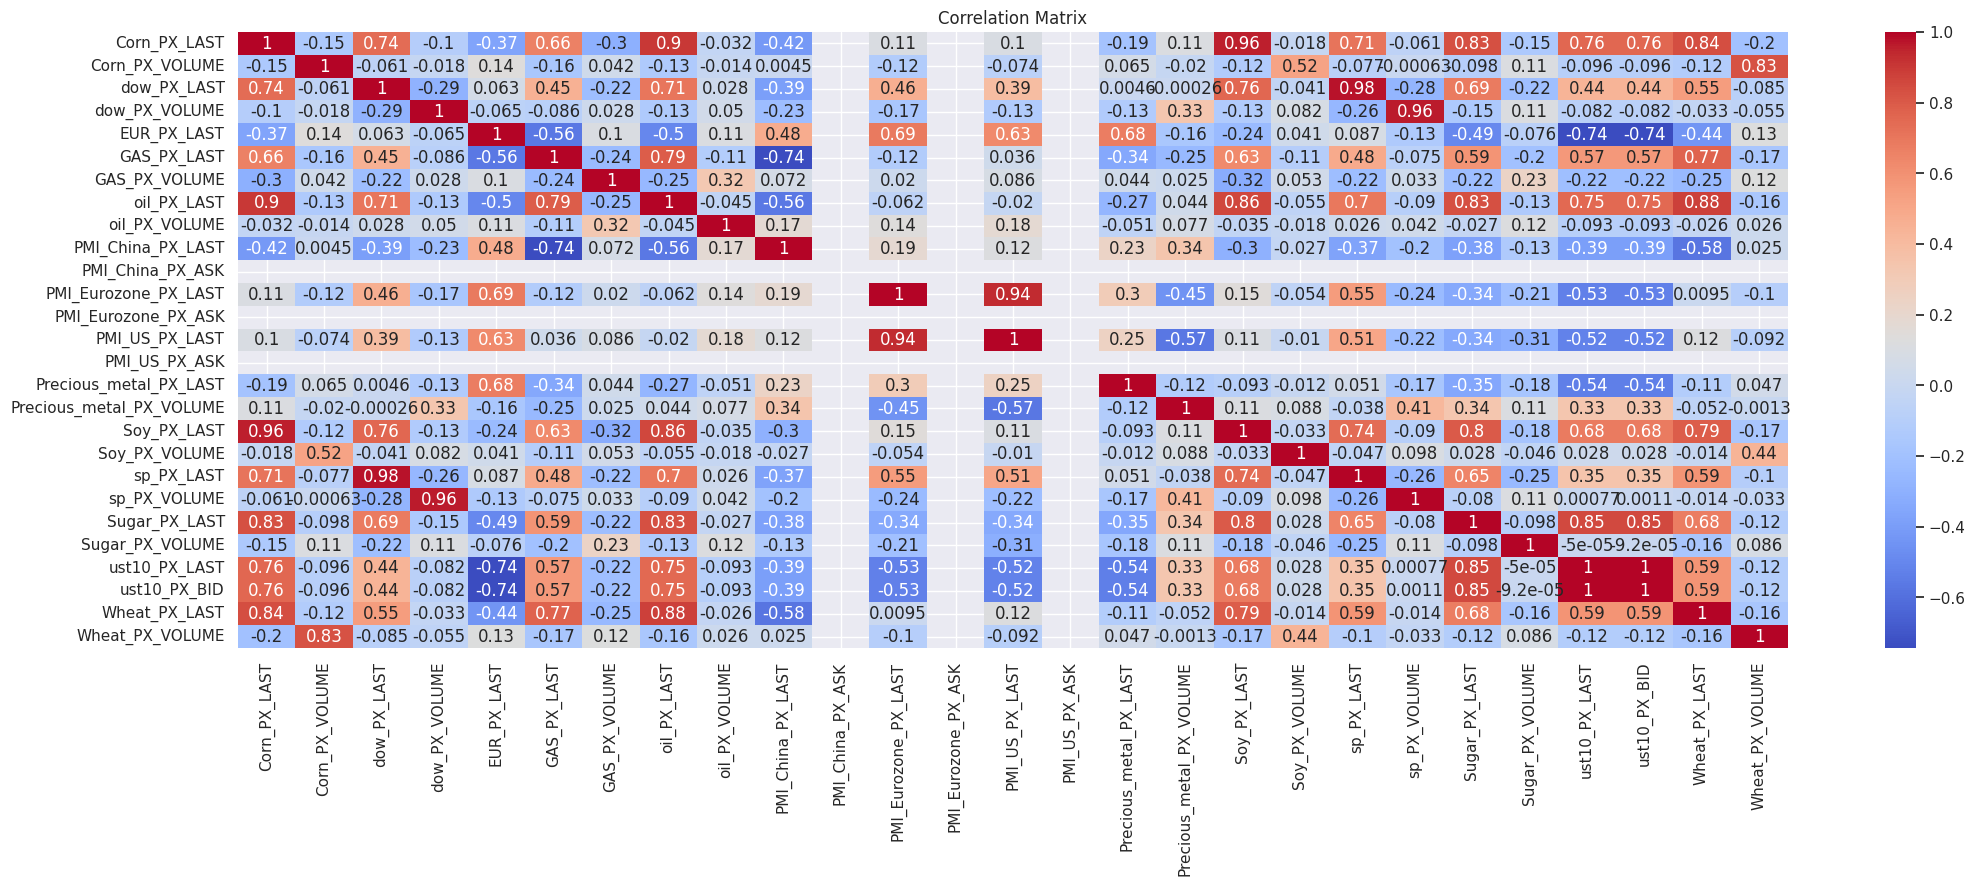

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import scipy
from sklearn.preprocessing import MinMaxScaler

#Import data
train = pd.read_excel('data.xlsx')

train.head()
print("shape: ",train.shape)


#Data visualization
#First heatmaps, to remove the least interesting variables
#Heatmaps: correlation between the variables and the Y*
# Calculer la matrice de corrélation
corr_matrix = train.corr()

# Créer une heatmap
plt.figure(figsize=(25, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Ajouter un titre au graphique
plt.title('Correlation Matrix')

# Afficher le graphique
plt.show()

Remove the variables beetwen -0.20 and 0.20: corn px volume, dow px volume, oil px volume, eurozone px last, us px last, precious metal px volume, wheat px volume, sugar px volume, sp px volume, soy px volume

Redo the heatmap after

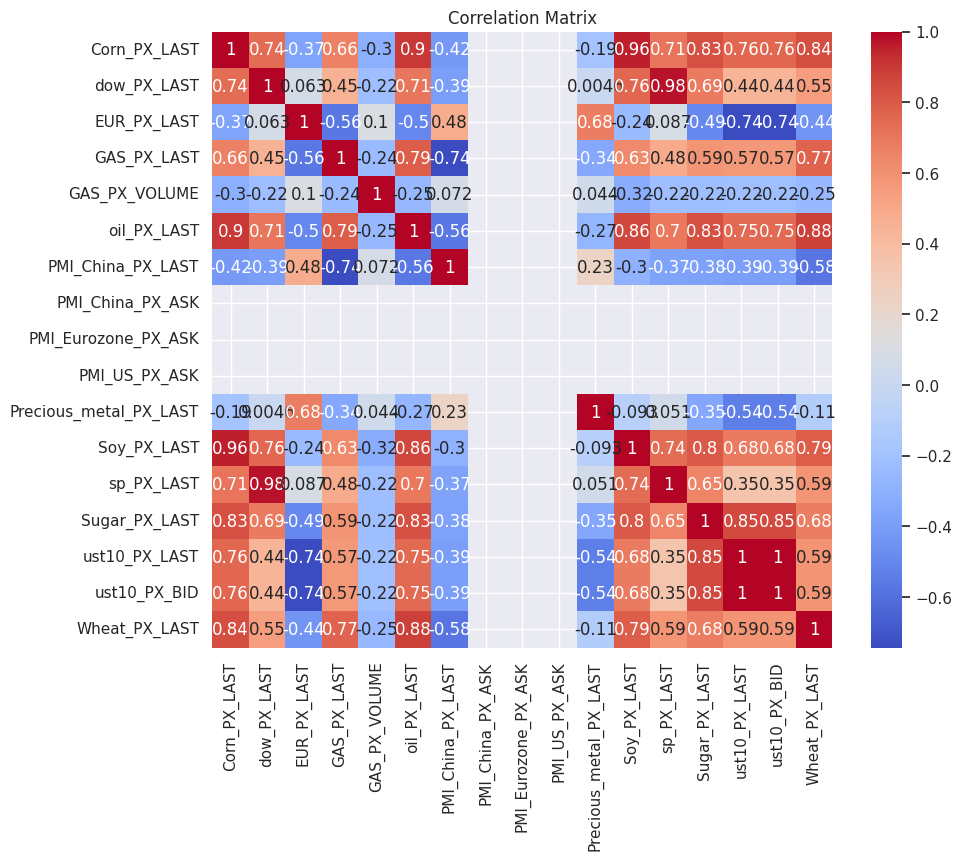

In [78]:
train = train.drop(['Corn_PX_VOLUME','dow_PX_VOLUME','oil_PX_VOLUME','PMI_Eurozone_PX_LAST','PMI_US_PX_LAST','Precious_metal_PX_VOLUME'], axis = 1)
train = train.drop(['Wheat_PX_VOLUME','Sugar_PX_VOLUME','sp_PX_VOLUME','Soy_PX_VOLUME'], axis = 1)

#Redo the heatmap
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

 Variables that are almost empty: China px ask, eurozone px ask, pmi us px ask
 
Describe those variables

In [79]:
print(train[['PMI_China_PX_LAST','PMI_Eurozone_PX_ASK','PMI_US_PX_ASK']].describe())

       PMI_China_PX_LAST  PMI_Eurozone_PX_ASK  PMI_US_PX_ASK
count          40.000000                  0.0            0.0
mean           49.975000                  NaN            NaN
std             2.620212                  NaN            NaN
min            35.700000                  NaN            NaN
25%            49.575000                  NaN            NaN
50%            50.250000                  NaN            NaN
75%            51.100000                  NaN            NaN
max            52.600000                  NaN            NaN


Remove the PMI_Eurozone_PX_ASK, PMI_China_PX_ASK and PMI_US_PX_ASK columns: we will have to search for the data later

We will first train the models with the dataset without adding and then see the difference with the added dataset

In [80]:
train = train.drop(['PMI_Eurozone_PX_ASK','PMI_US_PX_ASK','PMI_China_PX_ASK'], axis = 1)

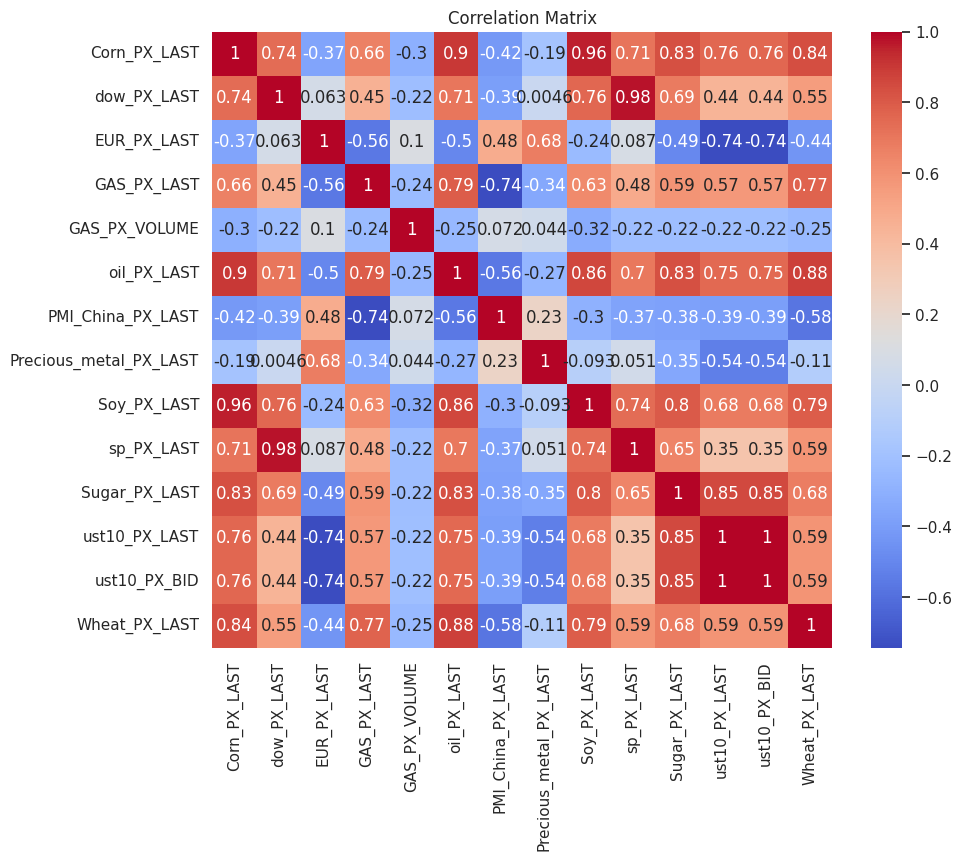

In [81]:
#Redo the heatmap
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

PMI_China_PX_LAST is almost empty, we will fill this variables and try to see the new correlation with the oil price to see if we keep it.

Try to fill the PMI_China_PX_LAST and all the other variables

In [82]:
print("MISSING VALUES:t\n",train.isnull().sum())
train = train.ffill()
nombre_valeurs_nulles = train['PMI_China_PX_LAST'].isnull().sum()
print(nombre_valeurs_nulles)
print("MISSING VALUES:t\n",train.isnull().sum())
#Drop the lines with one null value
train = train.dropna()
print("MISSING VALUES:t\n",train.isnull().sum())

MISSING VALUES:t
 Date                         0
Corn_PX_LAST               376
dow_PX_LAST                379
EUR_PX_LAST                348
GAS_PX_LAST                376
GAS_PX_VOLUME              378
oil_PX_LAST                355
PMI_China_PX_LAST         1179
Precious_metal_PX_LAST     379
Soy_PX_LAST                376
sp_PX_LAST                 379
Sugar_PX_LAST              374
ust10_PX_LAST              348
ust10_PX_BID               348
Wheat_PX_LAST              377
dtype: int64
4
MISSING VALUES:t
 Date                      0
Corn_PX_LAST              0
dow_PX_LAST               1
EUR_PX_LAST               0
GAS_PX_LAST               0
GAS_PX_VOLUME             0
oil_PX_LAST               0
PMI_China_PX_LAST         4
Precious_metal_PX_LAST    1
Soy_PX_LAST               0
sp_PX_LAST                1
Sugar_PX_LAST             0
ust10_PX_LAST             0
ust10_PX_BID              0
Wheat_PX_LAST             1
dtype: int64
MISSING VALUES:t
 Date                      0
Corn_

Let us plot the correlation between the oil price and the PMI_China_PX_LAST.

But first, do a normalization with the min max technique

0


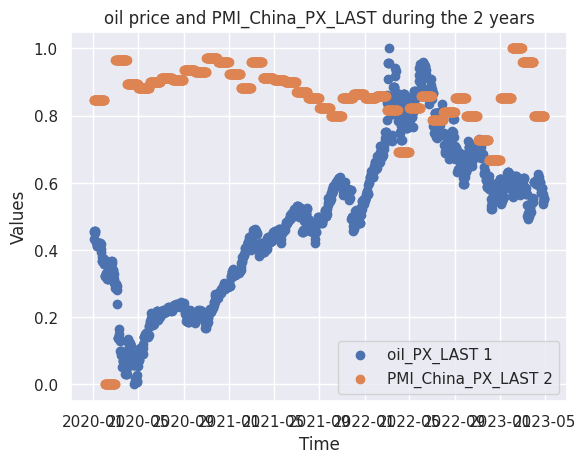

In [83]:
nombre_valeurs_nulles = train['oil_PX_LAST'].isnull().sum()
print(nombre_valeurs_nulles)

#Normalization
scaler = MinMaxScaler()

from sklearn import preprocessing
#normalize oil price
transformer = preprocessing.MinMaxScaler().fit(train[['oil_PX_LAST']])
X_transformed = transformer.transform(train[['oil_PX_LAST']])
train['oil_PX_LAST'] = X_transformed
# print(train['oil_PX_LAST'])
#normalize pmi china px last
transformer = preprocessing.MinMaxScaler().fit(train[['PMI_China_PX_LAST']])
X_transformed = transformer.transform(train[['PMI_China_PX_LAST']])
train['PMI_China_PX_LAST'] = X_transformed
# print(train['PMI_China_PX_LAST'])

#Show
variable1 = train['oil_PX_LAST']
variable2 = train['PMI_China_PX_LAST']
plt.figure()
plt.scatter(train['Date'], variable1, label='oil_PX_LAST 1')
plt.scatter(train['Date'], variable2, label='PMI_China_PX_LAST 2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('oil price and PMI_China_PX_LAST during the 2 years')
plt.show()

The 2 variables odes not seem to be correlated.

Let us calculate the correlation with the interpolation technique

In [84]:
data = train[['Date', 'PMI_China_PX_LAST', 'oil_PX_LAST']]
data = data.dropna()
correlation = np.corrcoef(data['PMI_China_PX_LAST'], data['oil_PX_LAST'])[0, 1]
print("Correlation between the 2 variables :", correlation)

Correlation between the 2 variables : -0.1858643910866074


La correlation est inférieur à 0.20, on peut supprimer cette variable.

Ce genre de variable semble importante, on va essayer d'aller chercher la data pour eurozone px ask, pmi us px ask.

02/01/2020 --> 04/05/2023 mais pas trouvé pour l'instant on va faire sans

Plot the distribution of the variables left:

Corn_PX_LAST,
dow_PX_LAST,
EUR_PX_LAST.

GAS_PX_LAST,
GAS_PX_VOLUME,
PMI_China_PX_LAST.

Precious_metal_PX_LAST,
Soy_PX_LAST,
sp_PX_LAST.

Sugar_PX_LAST,
ust10_PX_LAST,
ust10_PX_BID,
Wheat_PX_LAST.

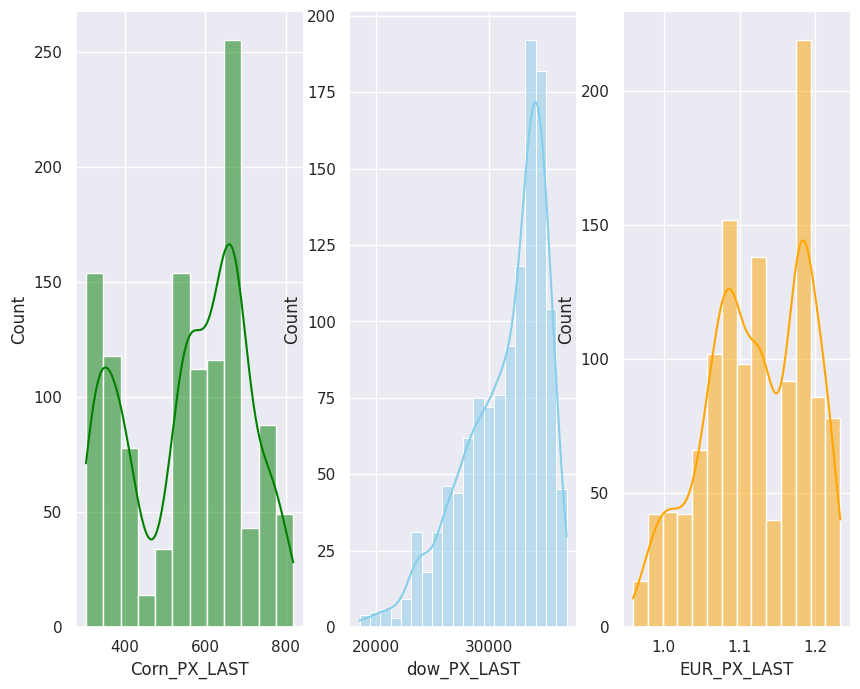

In [85]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
plt.subplot(1,3,1)
sns.histplot(data = train, x = train['Corn_PX_LAST'], kde = True, color = 'green')
plt.subplot(1,3,2)
sns.histplot(data = train, x = train["dow_PX_LAST"], kde = True, color = 'skyblue')
plt.subplot(1,3,3)
sns.histplot(data = train, x = train["EUR_PX_LAST"], kde = True, color = 'orange')
plt.show()

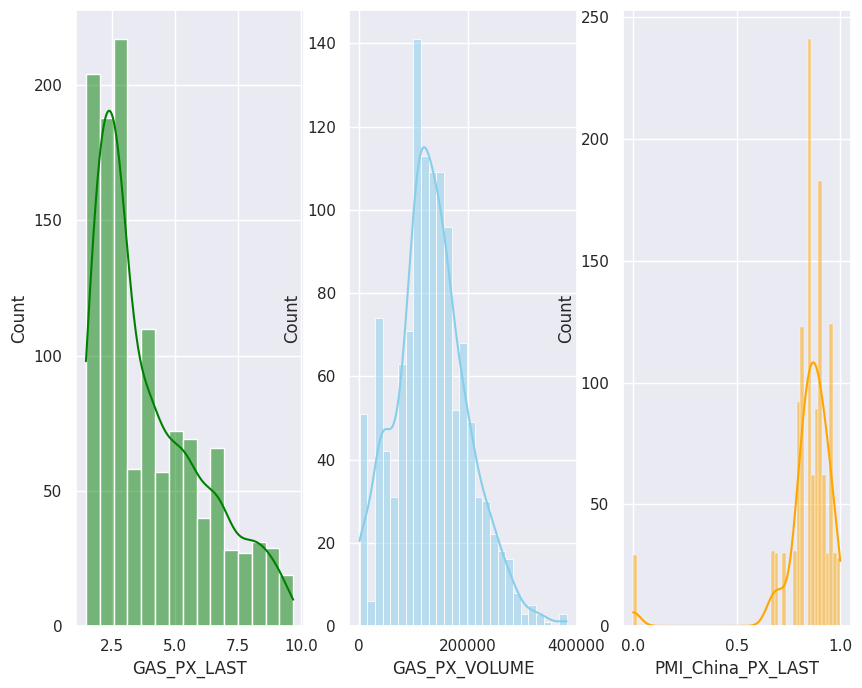

In [86]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
plt.subplot(1,3,1)
sns.histplot(data = train, x = train['GAS_PX_LAST'], kde = True, color = 'green')
plt.subplot(1,3,2)
sns.histplot(data = train, x = train["GAS_PX_VOLUME"], kde = True, color = 'skyblue')
plt.subplot(1,3,3)
sns.histplot(data = train, x = train["PMI_China_PX_LAST"], kde = True, color = 'orange')
plt.show()

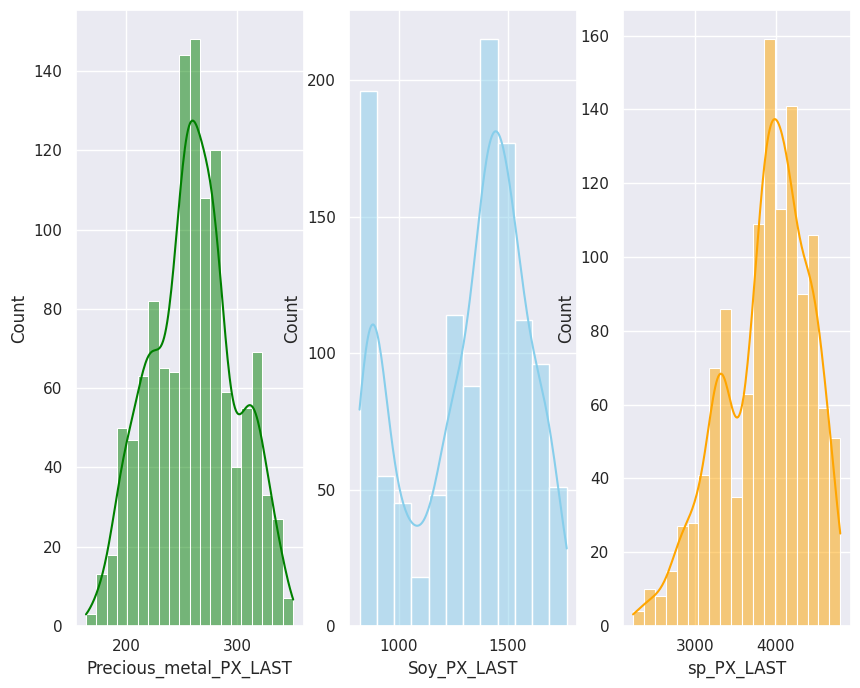

In [87]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
plt.subplot(1,3,1)
sns.histplot(data = train, x = train['Precious_metal_PX_LAST'], kde = True, color = 'green')
plt.subplot(1,3,2)
sns.histplot(data = train, x = train["Soy_PX_LAST"], kde = True, color = 'skyblue')
plt.subplot(1,3,3)
sns.histplot(data = train, x = train["sp_PX_LAST"], kde = True, color = 'orange')
plt.show()

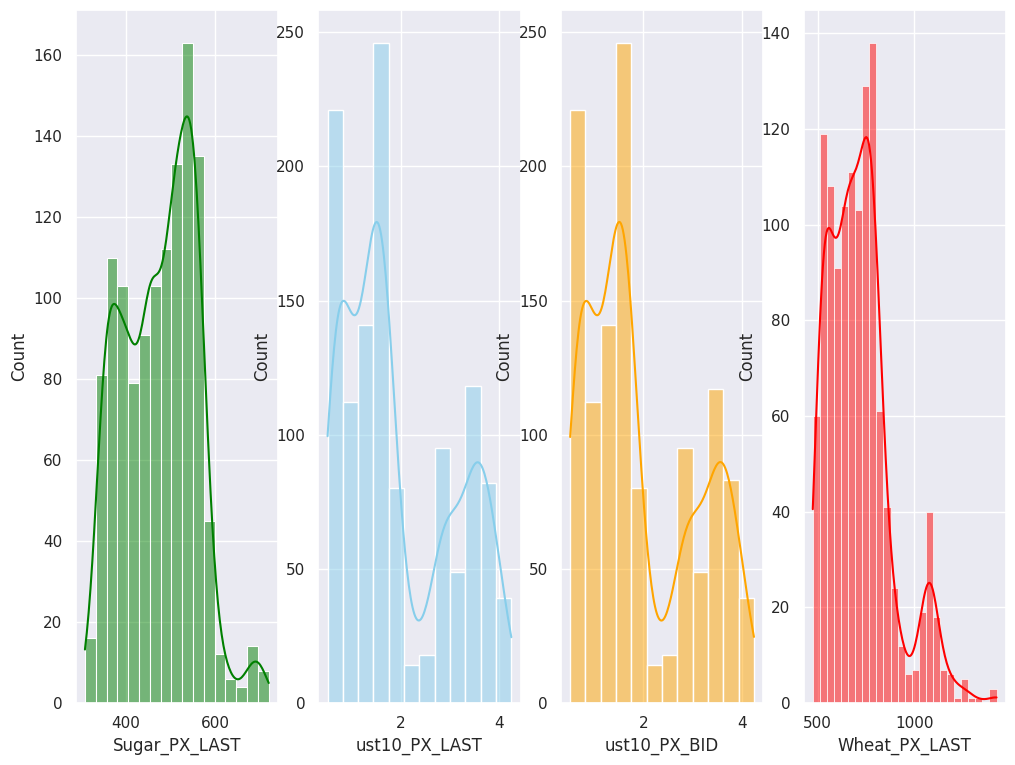

In [88]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 4, figsize=(12, 9))
plt.subplot(1,4,1)
sns.histplot(data = train, x = train['Sugar_PX_LAST'], kde = True, color = 'green')
plt.subplot(1,4,2)
sns.histplot(data = train, x = train["ust10_PX_LAST"], kde = True, color = 'skyblue')
plt.subplot(1,4,3)
sns.histplot(data = train, x = train["ust10_PX_BID"], kde = True, color = 'orange')
plt.subplot(1,4,4)
sns.histplot(data = train, x = train["Wheat_PX_LAST"], kde = True, color = 'red')
plt.show()

#We can see that the following variables are skewed:

dow_PX_LAST, GAS_PX_LAST, Sugar_PX_LAST, ust10_PX_LAST, ust10_PX_BID.

Log Transformation: Apply a logarithmic transformation to a variable to reduce the skewness.

Show the difference: before and after

BEFORE

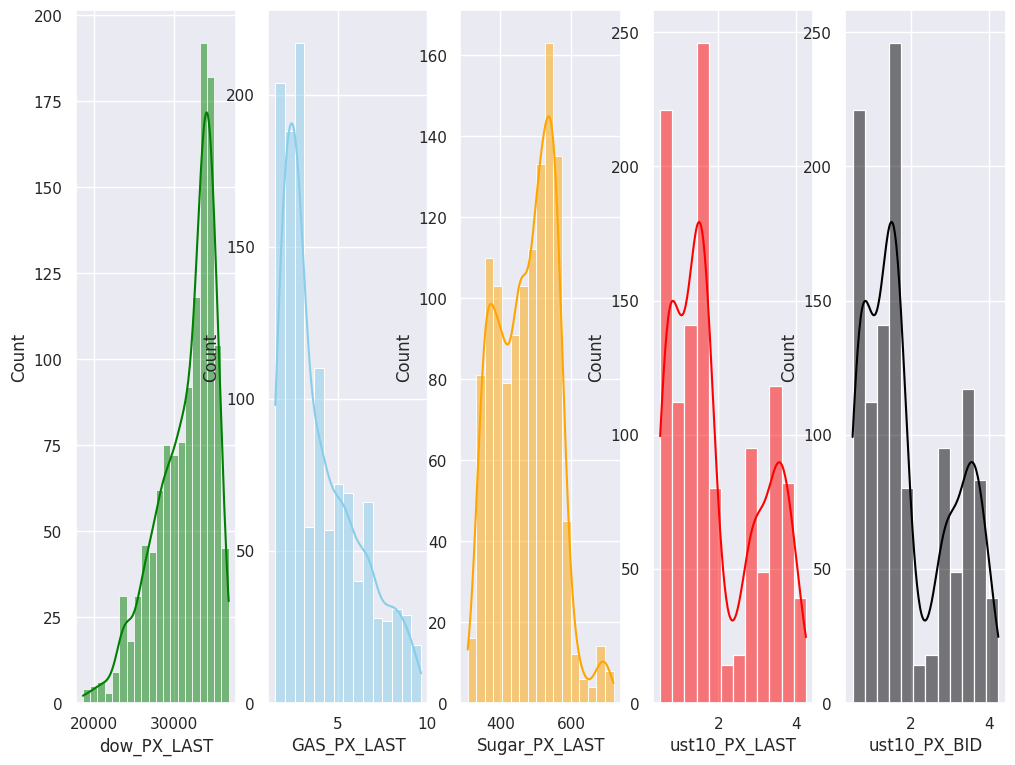

In [89]:
#Show the difference
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 5, figsize=(12, 9))
plt.subplot(1,5,1)
sns.histplot(data = train, x = train['dow_PX_LAST'], kde = True, color = 'green')
plt.subplot(1,5,2)
sns.histplot(data = train, x = train["GAS_PX_LAST"], kde = True, color = 'skyblue')
plt.subplot(1,5,3)
sns.histplot(data = train, x = train["Sugar_PX_LAST"], kde = True, color = 'orange')
plt.subplot(1,5,4)
sns.histplot(data = train, x = train["ust10_PX_LAST"], kde = True, color = 'red')
plt.subplot(1,5,5)
sns.histplot(data = train, x = train["ust10_PX_BID"], kde = True, color = 'black')
plt.show()

Apply a logarithmic transformation

In [90]:
train['dow_PX_LAST'] = np.log(train['dow_PX_LAST'])
train['GAS_PX_LAST'] = np.log(train['GAS_PX_LAST'])
train['Sugar_PX_LAST'] = np.log(train['Sugar_PX_LAST'])
train['ust10_PX_LAST'] = np.log(train['ust10_PX_LAST'])
train['ust10_PX_BID'] = np.log(train['ust10_PX_BID'])

AFTER

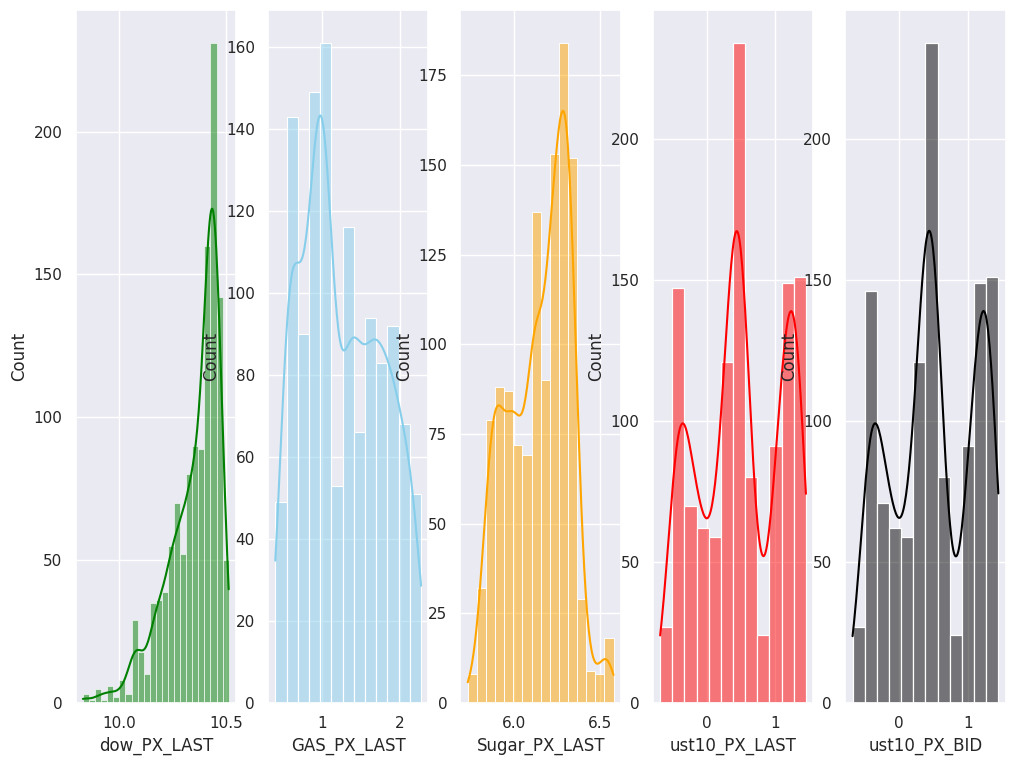

In [91]:
#Show the difference
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 5, figsize=(12, 9))
plt.subplot(1,5,1)
sns.histplot(data = train, x = train['dow_PX_LAST'], kde = True, color = 'green')
plt.subplot(1,5,2)
sns.histplot(data = train, x = train["GAS_PX_LAST"], kde = True, color = 'skyblue')
plt.subplot(1,5,3)
sns.histplot(data = train, x = train["Sugar_PX_LAST"], kde = True, color = 'orange')
plt.subplot(1,5,4)
sns.histplot(data = train, x = train["ust10_PX_LAST"], kde = True, color = 'red')
plt.subplot(1,5,5)
sns.histplot(data = train, x = train["ust10_PX_BID"], kde = True, color = 'black')
plt.show()

Efficient.

Now the outliers, we will print the boxplot of each variables to s=visualize the outliers.

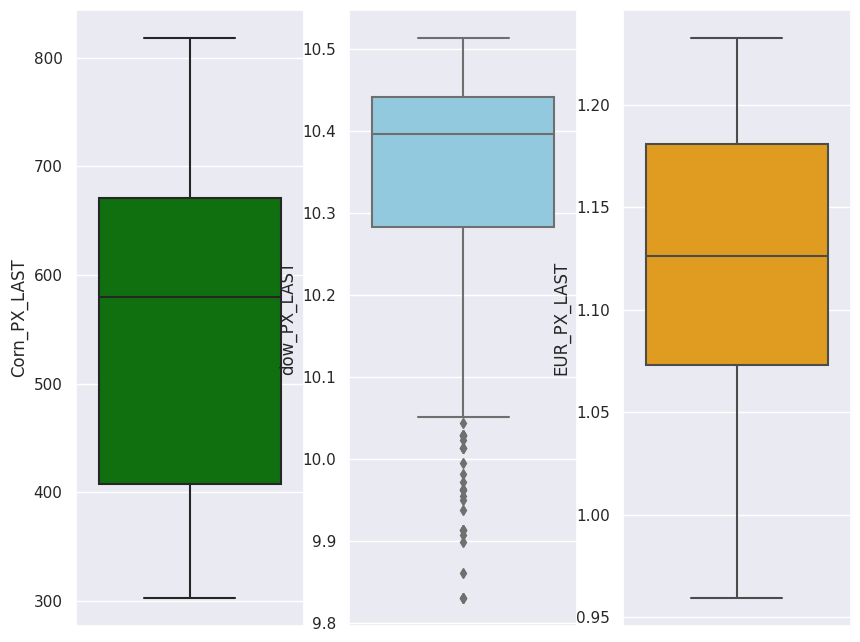

In [92]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
plt.subplot(1,3,1)
sns.boxplot(train["Date"],y = train['Corn_PX_LAST'], color = 'green')
plt.subplot(1,3,2)
sns.boxplot(train["Date"],y = train["dow_PX_LAST"],color = 'skyblue')
plt.subplot(1,3,3)
sns.boxplot(train["Date"],y = train["EUR_PX_LAST"], color = 'orange')
plt.show()

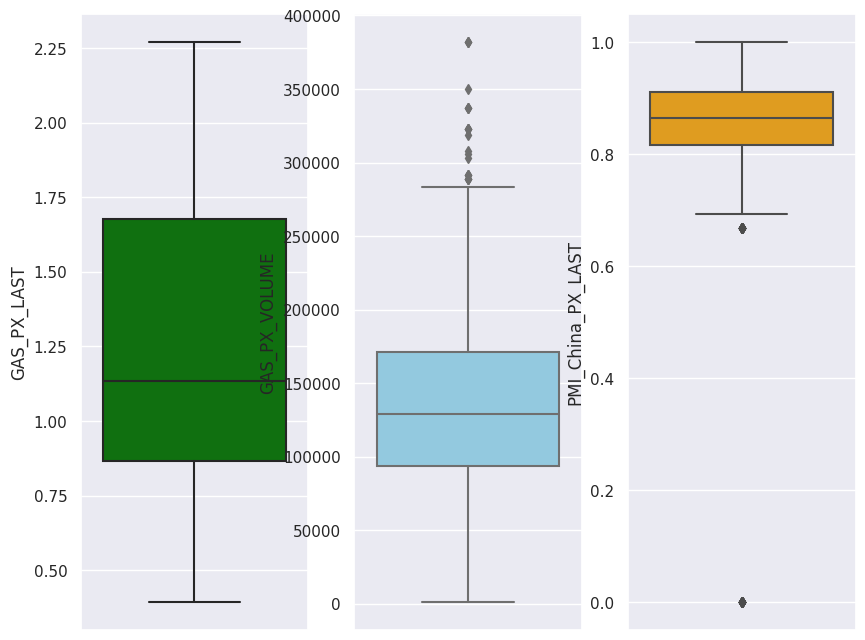

In [93]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
plt.subplot(1,3,1)
sns.boxplot(train["Date"], y = train['GAS_PX_LAST'],color = 'green')
plt.subplot(1,3,2)
sns.boxplot(train["Date"], y = train["GAS_PX_VOLUME"],  color = 'skyblue')
plt.subplot(1,3,3)
sns.boxplot(train["Date"], y = train["PMI_China_PX_LAST"],  color = 'orange')
plt.show()

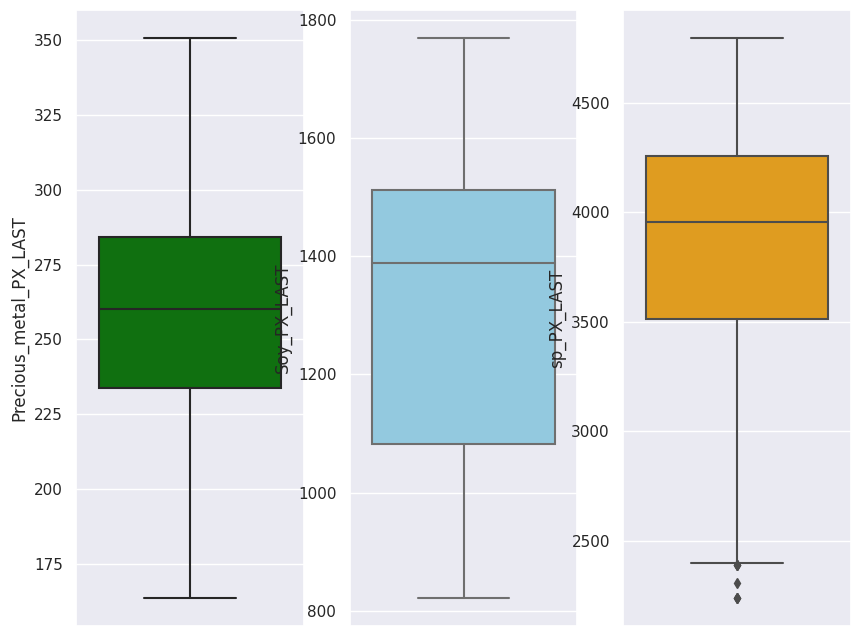

In [94]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
plt.subplot(1,3,1)
sns.boxplot(train["Date"], y = train['Precious_metal_PX_LAST'], color = 'green')
plt.subplot(1,3,2)
sns.boxplot(train["Date"], y = train["Soy_PX_LAST"], color = 'skyblue')
plt.subplot(1,3,3)
sns.boxplot(train["Date"], y = train["sp_PX_LAST"],  color = 'orange')
plt.show()

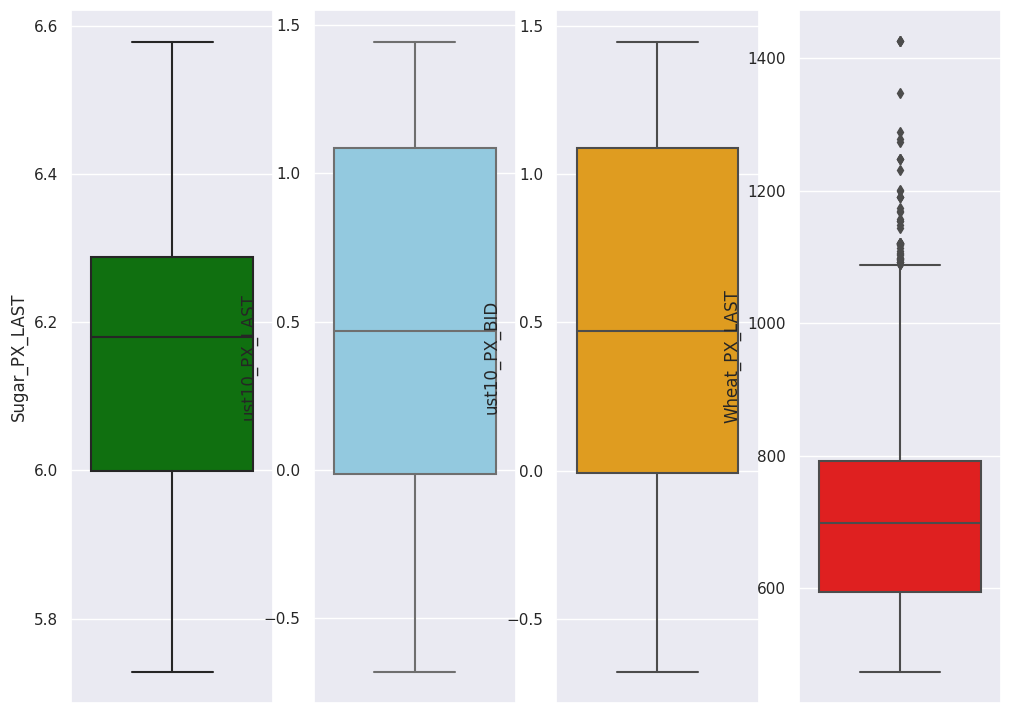

In [95]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 4, figsize=(12, 9))
plt.subplot(1,4,1)
sns.boxplot(train["Date"], y = train['Sugar_PX_LAST'],  color = 'green')
plt.subplot(1,4,2)
sns.boxplot(train["Date"], y = train["ust10_PX_LAST"],  color = 'skyblue')
plt.subplot(1,4,3)
sns.boxplot(train["Date"], y = train["ust10_PX_BID"], color = 'orange')
plt.subplot(1,4,4)
sns.boxplot(train["Date"], y = train["Wheat_PX_LAST"], color = 'red')
plt.show()

#We can see that some variables have some outliers: 

dow_PX_LAST, GAS_PX_VOLUME, PMI_China_PX_LAST, sp_PX_LAST, Wheat_PX_LAST

We will use the Interquartile Range method to those variables

In [96]:
outliers_columns = ['dow_PX_LAST','GAS_PX_VOLUME','PMI_China_PX_LAST','sp_PX_LAST','Wheat_PX_LAST']
#We will use the Interquartile Range method
# Calculer les quartiles Q1, Q3 et l'IQR (Interquartile Range)
for colonne in outliers_columns:
    Q1 = train[colonne].quantile(0.25)
    Q3 = train[colonne].quantile(0.75)
    IQR = Q3 - Q1

    # Définir les seuils inférieur et supérieur pour détecter les outliers
    seuil_inferieur = Q1 - 1.5 * IQR
    seuil_superieur = Q3 + 1.5 * IQR

    # Supprimer les outliers de la colonne
    train = train[(train[colonne] >= seuil_inferieur) & (train[colonne] <= seuil_superieur)]


Show the difference

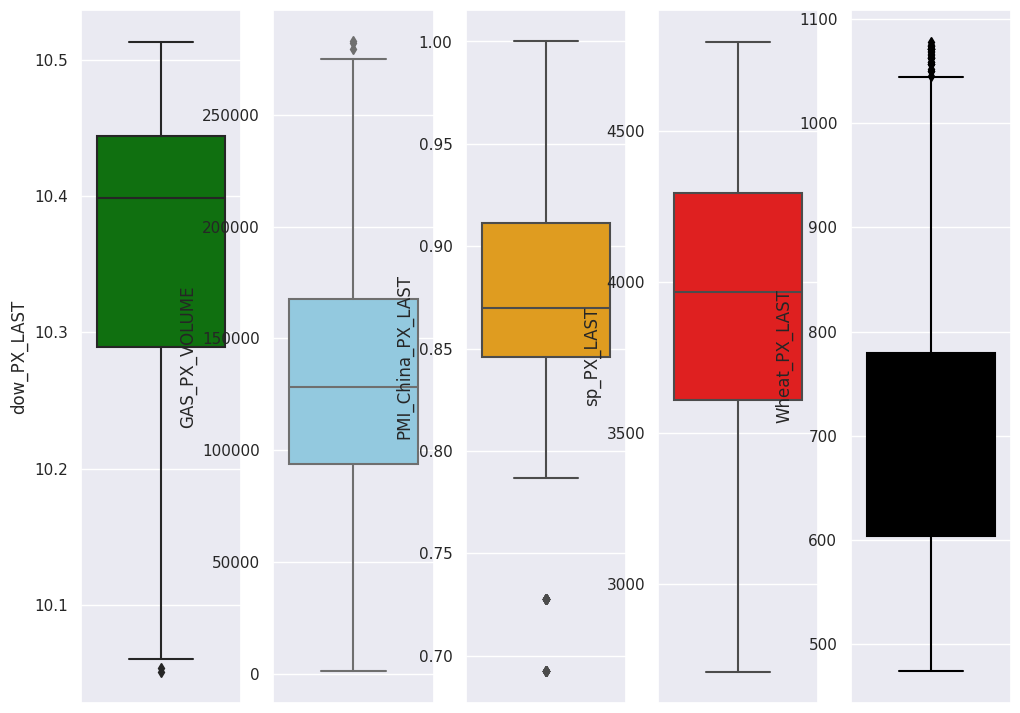

In [97]:
#Show the difference
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 5, figsize=(12, 9))
plt.subplot(1,5,1)
sns.boxplot(train["Date"], y = train['dow_PX_LAST'],  color = 'green')
plt.subplot(1,5,2)
sns.boxplot(train["Date"], y = train["GAS_PX_VOLUME"],  color = 'skyblue')
plt.subplot(1,5,3)
sns.boxplot(train["Date"], y = train["PMI_China_PX_LAST"], color = 'orange')
plt.subplot(1,5,4)
sns.boxplot(train["Date"], y = train["sp_PX_LAST"], color = 'red')
plt.subplot(1,5,5)
sns.boxplot(train["Date"], y = train["Wheat_PX_LAST"], color = 'black')
plt.show()

The outliers had been deleted

The data is clean now 

Let us do the models:

1. Linear models
  linear models
  Support Vector Machine    *DONE WITH CLEAN DATA*

2. Modèles ARIMA : Les modèles ARIMA (AutoRegressive Integrated Moving Average) sont efficaces pour modéliser les séries temporelles et peuvent être adaptés pour prévoir les prix de l'huile. Ces modèles sont utiles lorsque les données présentent une tendance et des motifs saisonniers.
*DONE WITH CLEAN DATA*


3. Random Forest *DONE WITH CLEAN DATA*, XGBoost

4. réseaux de neurones artificiels (ANN) (Antoine)

5. Elastic Net *DONE WITH CLEAN DATA*

Pas obligatoire de tester all of them but we can pick some. Let decide together

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#SVM
train = pd.read_csv('data_clean.csv')
#The data is clean now
#First, cross validation
x = train.drop(["oil_PX_LAST", "Date"], axis = 1)
y = train["oil_PX_LAST"]


#Let us apply the different models
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your input features stored in X and the corresponding numerical outputs in y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an SVR model with desired parameters
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R²):", r2)



Mean Squared Error (MSE): 0.03361228619065763
Coefficient of Determination (R²): 0.18366294670281047


ARIMA

Forecasted values: 1050    0.430589
1051    0.430464
1052    0.430403
1053    0.430344
1054    0.430287
1055    0.430229
1056    0.430171
1057    0.430113
1058    0.430055
1059    0.429997
1060    0.429939
1061    0.429881
1062    0.429823
1063    0.429765
1064    0.429707
1065    0.429649
1066    0.429591
1067    0.429533
1068    0.429475
1069    0.429417
1070    0.429359
1071    0.429301
1072    0.429243
1073    0.429186
1074    0.429128
1075    0.429070
1076    0.429012
1077    0.428954
1078    0.428896
1079    0.428838
1080    0.428780
1081    0.428722
1082    0.428664
1083    0.428606
1084    0.428548
1085    0.428490
1086    0.428432
1087    0.428374
1088    0.428316
1089    0.428258
1090    0.428200
1091    0.428142
1092    0.428085
1093    0.428027
1094    0.427969
1095    0.427911
1096    0.427853
1097    0.427795
1098    0.427737
1099    0.427679
Name: predicted_mean, dtype: float64


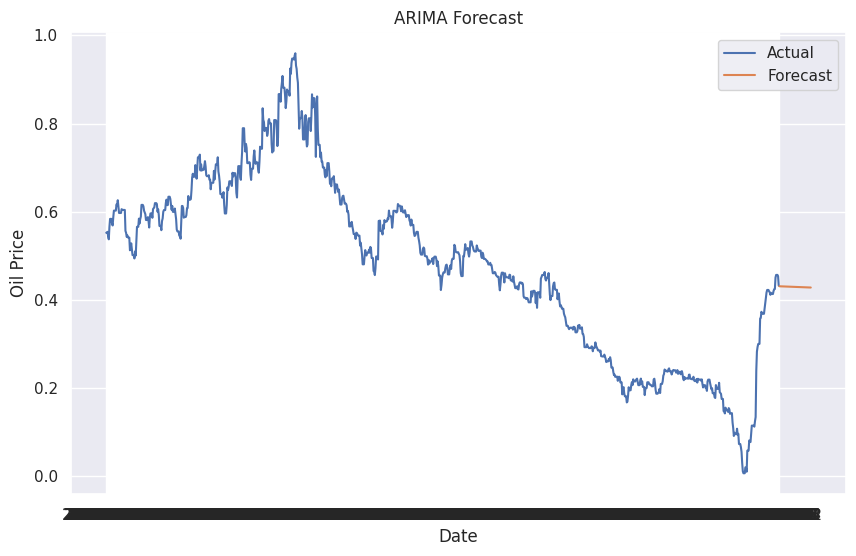

In [99]:
#Not a good result, let us try with other model before adding some varibales to the dataset
from statsmodels.tsa.arima.model import ARIMA
# from pmdarima: import auto_arima

# Assuming you have your time series data stored in a pandas DataFrame named 'data'
# and the values are in a column named 'value'
# Set 'Date' column as the index of the DataFrame
train.set_index('Date', inplace=True)

# Find the best order parameters using auto_arima
# model_auto = auto_arima(train['oil_PX_LAST'], start_p=0, start_q=0, max_p=3, max_q=3, seasonal=False)
# print(model_auto.order)
# Create the ARIMA model
# model = ARIMA(train['oil_PX_LAST'], order=model_auto.order)  # Replace p, d, q with the desired order values
model = ARIMA(train['oil_PX_LAST'], order=(1,2,1))  # Replace p, d, q with the desired order values

# Fit the model to the data
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=50)  # Replace 10 with the desired number of future steps

# Print the forecasted values
print("Forecasted values:", forecast)

# Plot the time series and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['oil_PX_LAST'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('ARIMA Forecast')
plt.show()


Elastic NEt

In [100]:
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the Elastic Net model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust the alpha and l1_ratio parameters as desired

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
#R square very good (0.90) and very low mean squarred


Mean Squared Error: 0.004051763038008183
R-squared: 0.9015953785367505


Random Forest

In [101]:
#Razndom forest
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a DataFrame named 'data' with features and target columns

# Split the data into features (X) and target variable (y)
X = train.drop('oil_PX_LAST', axis=1)  # Assuming 'Price' is the target variable
y = train['oil_PX_LAST']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust the n_estimators as desired

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.00045078509995949916
R-squared: 0.9890518431836541


Monday and january phenomenon explanation and visualization (Migao)

Ajouter des variables dans le dataset. 02/01/2020 --> 04/05/2023

Variables à ajouter:

1.   Sun activity (Alexis)
2.   Solar panel (difficile)(Alexis)
3. Carbon émission EU ETS (migao)
4. fuel price (migao)
5. Température des pays consomateurs (Inde, US and Chine)  (Alexis)

Variables ajoutées:

1. Pas trouvé
2. Cleaning done (but i just have from 2020-02-01  to 2022-02-27 (kWh electricity/day  Gas/day))
3. 
4. 
5. Cleaning done (but i just have 5 month: from 01/01/2020 to 01/05/2020)


Solar panel cleaning

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import scipy
from sklearn.preprocessing import MinMaxScaler

#Import data
df = pd.read_csv('solar.csv')

print(df['Date'].dtype)

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

#Keep only the dates between 02/01/2020 --> 04/05/2023
# Define the date range
start_date = pd.to_datetime('02/01/2020')
end_date = pd.to_datetime('04/05/2023')

# Filter out the rows outside the date range
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

print(df.head)

#Drop the cumulative
df = df.drop('Cumulative_solar_power', axis=1)

#Drop every null lines
df = df.dropna()

print(df.head)

df.to_csv('solar_kWh_gas_day.csv', index=False)

object
<bound method NDFrame.head of            Date  Cumulative_solar_power  kWh electricity/day  Gas/day
3020 2020-02-01                 32414.0                 10.0     12.0
3021 2020-02-02                 32416.0                 14.0     11.0
3022 2020-02-03                 32418.0                 17.0     11.0
3023 2020-02-04                 32420.0                 13.0     11.0
3024 2020-02-05                 32422.0                 17.0     14.0
...         ...                     ...                  ...      ...
3837 2022-04-28                     NaN                  NaN      NaN
3838 2022-04-29                     NaN                  NaN      NaN
3839 2022-04-30                     NaN                  NaN      NaN
3840 2022-05-01                     NaN                  NaN      NaN
3841 2022-05-02                     NaN                  NaN      NaN

[822 rows x 4 columns]>
<bound method NDFrame.head of            Date  kWh electricity/day  Gas/day
3020 2020-02-01       

Temperature USA, China and India cleaning

In [103]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import missingno as mso
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')
# import os
# import scipy
# from sklearn.preprocessing import MinMaxScaler

# #Import data
# df = pd.read_csv('city_temperature.csv')

# # Convert 'Day', 'Year', and 'Month' columns to a date type
# df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')


# #Keep only the dates between 02/01/2020 --> 04/05/2023
# # Define the date range
# start_date = pd.to_datetime('02/01/2020')
# end_date = pd.to_datetime('04/05/2023')

# # Filter out the rows outside the date range
# df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# #Keep only the cities in China, North America and India
# df = df[df['Country'].str.contains('US|India|China')]
# # Filter out 'US' --> New york
# us_data = df[df['City'].str.contains('New York')]
# df['US_temp'] = us_data['AvgTemperature']
# df['Date2'] = us_data['Date']
# us = us_data[['Date', 'AvgTemperature']]#.copy()
# # print(us)
# # Save the new DataFrame to CSV
# # us.to_csv('us_temp.csv', index=False)

# # Filter out 'India' --> New Delhi
# india_data = df[df['City'].str.contains('Delhi')]
# india = india_data[['Date', 'AvgTemperature']]#.copy()
# print(india)
# # Save the new DataFrame to CSV
# india.to_csv('india_temp.csv', index=False)

# # # Filter out 'China' --> Beijing
# china_data = df[df['City'].str.contains('Beijing')]
# china = china_data[['Date', 'AvgTemperature']]#.copy()
# # print(china)
# # Save the new DataFrame to CSV
# china.to_csv('china_temp.csv', index=False)

Fusion avec le data set clean

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import scipy
from sklearn.preprocessing import MinMaxScaler

#Import data
solar = pd.read_csv('solar_kWh_gas_day.csv')
us = pd.read_csv('us_temp.csv')
india = pd.read_csv('india_temp.csv')
china = pd.read_csv('china_temp.csv')
clean = pd.read_csv('data_clean.csv')

#Rename the temperatures
india.rename(columns={'AvgTemperature': 'india_temp'}, inplace=True)
china.rename(columns={'AvgTemperature': 'china_temp'}, inplace=True)
us.rename(columns={'AvgTemperature': 'us_temp'}, inplace=True)

print(us.head)
print(china.head)
print(india.head)
print(solar.head)

#Create a new one with all the extra variables
extra = pd.merge(india, china, on='Date')
extra = pd.merge(extra, us, on='Date')
extra = pd.merge(extra, solar, on='Date')
print(extra.head)

#Remove all the null lines
extra = extra.dropna()

#I have all the extra variables in one
#Now let us fusion with our big dataset
fusion = pd.merge(extra, clean, on='Date')
print(fusion.head)

# Save the new DataFrame to CSV
fusion.to_csv('extra_dataset.csv', index=False)

<bound method NDFrame.head of            Date  us_temp
0    2020-02-01     38.8
1    2020-02-02     39.1
2    2020-02-03     44.1
3    2020-02-04     46.4
4    2020-02-05     44.4
..          ...      ...
98   2020-05-09     42.2
99   2020-05-10     50.3
100  2020-05-11     55.7
101  2020-05-12     51.1
102  2020-05-13     51.8

[103 rows x 2 columns]>
<bound method NDFrame.head of            Date  china_temp
0    2020-02-01        34.8
1    2020-02-02        26.9
2    2020-02-03        27.4
3    2020-02-04        24.6
4    2020-02-05        21.2
..          ...         ...
98   2020-05-09        60.6
99   2020-05-10        69.4
100  2020-05-11        73.0
101  2020-05-12        66.5
102  2020-05-13        72.5

[103 rows x 2 columns]>
<bound method NDFrame.head of            Date  india_temp
0    2020-02-01        54.2
1    2020-02-02        53.8
2    2020-02-03        55.3
3    2020-02-04        57.6
4    2020-02-05        56.4
..          ...         ...
97   2020-05-08        89.9


The datset is very small due to the short range of dates for the new extra variables (hard to find a recent dataset). So to evaluate the new dataset, we will use the bootstraping technique:

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import scipy
from sklearn.preprocessing import MinMaxScaler

#Import data
fusion = pd.read_csv('extra_dataset.csv')

#The dataset is very small, so let us do a boostrapping with the random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample

# Set the number of bootstrap iterations
n_iterations = 100

# Set the number of trees in the Random Forest
n_trees = 100

# Create an empty list to store the predictions from each bootstrap sample
predictions = []

# Perform bootstrapping
for i in range(n_iterations):
    # Create a bootstrap sample by resampling from the original dataset
    bootstrap_sample = resample(fusion, replace=True)
    
    # Split the bootstrap sample into features (X) and target (y)
    X = bootstrap_sample.drop(['oil_PX_LAST','Date'], axis=1)
    y = bootstrap_sample['oil_PX_LAST']
    
    # Train a Random Forest model on the bootstrap sample
    model = RandomForestRegressor(n_estimators=n_trees)
    model.fit(X, y)
    
    # Make predictions on the original dataset using the trained model
    y_pred = model.predict(fusion.drop(['oil_PX_LAST','Date'], axis=1))
    
    # Store the predictions
    predictions.append(y_pred)

# Combine the predictions from all bootstrap iterations
combined_predictions = pd.DataFrame(predictions).mean()

# Evaluate or use the combined predictions as needed
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'target' is the actual target values from your original dataset
target = fusion['oil_PX_LAST']

# Calculate evaluation metrics
mse = mean_squared_error(target, combined_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(target, combined_predictions)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.0001
Root Mean Squared Error: 0.0101
R-squared: 0.9857


On a de bons résultats R²=0.9869 and MSE = 0.0001 and RMSE = 0.0097

SVM bootstraping with extra_dataset

In [106]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your original DataFrame
fusion = pd.read_csv('extra_dataset.csv')
# Set the number of bootstrap iterations
n_iterations = 100

# Create an empty list to store the predictions from each bootstrap sample
predictions = []

# Perform bootstrapping
for i in range(n_iterations):
    # Create a bootstrap sample by resampling from the original dataset
    bootstrap_sample = resample(fusion, replace=True)
    
    # Split the bootstrap sample into features (X) and target (y)
    X = bootstrap_sample.drop(['oil_PX_LAST','Date'], axis=1)
    y = bootstrap_sample['oil_PX_LAST']

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Train an SVM model on the bootstrap sample
    model = SVR()
    model.fit(X, y)
    
    # Make predictions on the original dataset using the trained model
    y_pred = model.predict(fusion.drop(['oil_PX_LAST','Date'], axis=1))
    
    # Store the predictions
    predictions.append(y_pred)

# Combine the predictions from all bootstrap iterations
combined_predictions = pd.DataFrame(predictions).mean()

# Assuming 'target' is the actual target values from your original dataset
target = fusion['oil_PX_LAST']

# Calculate evaluation metrics
mse = mean_squared_error(target, combined_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(target, combined_predictions)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.0093
Root Mean Squared Error: 0.0965
R-squared: -0.3088


We obtain a negative R². It means that our model is not adapted to the dataset. The dataset here is too small for a model like SVM. It is not powerful enough with a small dataset even with the boostraping technique.

Let us try with the Elastic Net

In [107]:
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Import data
fusion = pd.read_csv('extra_dataset.csv')

# Set the number of bootstrap iterations
n_iterations = 100

# Create an empty list to store the predictions from each bootstrap sample
predictions = []

# Perform bootstrapping
for i in range(n_iterations):
    # Create a bootstrap sample by resampling from the original dataset
    bootstrap_sample = resample(fusion, replace=True)
    
    # Split the bootstrap sample into features (X) and target (y)
    X = bootstrap_sample.drop(['oil_PX_LAST','Date'], axis=1)
    y = bootstrap_sample['oil_PX_LAST']
    
    # Train an Elastic Net model on the bootstrap sample
    model = ElasticNet()
    model.fit(X, y)
    
    # Make predictions on the original dataset using the trained model
    y_pred = model.predict(fusion.drop(['oil_PX_LAST','Date'], axis=1))
    
    # Store the predictions
    predictions.append(y_pred)

# Combine the predictions from all bootstrap iterations
combined_predictions = pd.DataFrame(predictions).mean()

# Assuming 'target' is the actual target values from your original dataset
target = fusion['oil_PX_LAST']

# Calculate evaluation metrics
mse = mean_squared_error(target, combined_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(target, combined_predictions)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.0010
Root Mean Squared Error: 0.0321
R-squared: 0.8555


Good result but not better than the previous dataset
1. Mean Squared Error: 0.0010
2. Root Mean Squared Error: 0.0321
3. R-squared: 0.8554

Binary variable 

Variable ajoutées:
1. COVID CRISIS
2. Ukraine-Russia war
3. Law CO2 price (EU)
4. Opec supply restrictions
5. Saudi-Russian price war
6. Gas agreement



In [108]:
import pandas as pd

# Charger les données depuis le fichier Excel
data = pd.read_csv('data_clean.csv', parse_dates=['Date'], dayfirst=True)

# Ajouter une colonne vide pour la variable binaire
data['COVID_CRISIS'] = 0 ##https://en.wikipedia.org/wiki/2021%E2%80%932023_global_energy_crisis#Slow_supply_recovery_after_pandemic
data['Ukraine_Russia_war'] = 0 ##https://en.wikipedia.org/wiki/2021%E2%80%932023_global_energy_crisis#Russian_invasion_of_Ukraine
data['Law_CO2_price'] = 0 ##https://en.wikipedia.org/wiki/2021%E2%80%932023_global_energy_crisis#Climate_abnormality_impact_on_renewable_energy
data['OPEC_supply_restrictions']=0 ##https://en.wikipedia.org/wiki/2021%E2%80%932023_global_energy_crisis#OPEC_supply_restrictions
data['Saudi_Russian_price_war']=0 ##https://en.wikipedia.org/wiki/OPEC#2020:_Saudi-Russian_price_war
data['Gas_agreement']=0 ##https://fr.wikipedia.org/wiki/Crise_%C3%A9nerg%C3%A9tique_mondiale_de_2021-2023#R%C3%A9ponses_apport%C3%A9es

# Spécifier la date de l'événement
date_debut_COVID_CRISIS = pd.to_datetime('2021-09-01')
date_fin_COVID_CRISIS = pd.to_datetime('2022-09-01')
date_debut_Ukraine_Russia_war = pd.to_datetime('2022-02-24')
date_fin_Ukraine_Russia_war = pd.to_datetime('2022-05-01')
date_debut_Law_CO2_price = pd.to_datetime('2021-01-01')
date_fin_Law_CO2_price = pd.to_datetime('2023-01-15')
date_debut_OPEC_supply_restrictions = pd.to_datetime('2022-10-01')
date_fin_OPEC_supply_restrictions = pd.to_datetime('2022-12-01')
date_debut_Saudi_Russian_price_war = pd.to_datetime('2020-03-01')
date_fin_Saudi_Russian_price_war = pd.to_datetime('2020-07-01')
date_debut_Gas_agreement = pd.to_datetime('2021-10-01')
date_fin_Gas_agreement = pd.to_datetime('2021-12-01')


# Mettre à jour la colonne 'evenement' avec la valeur 1 pour les dates comprises entre la date de début et la date de fin
data.loc[(data['Date'] >= date_debut_COVID_CRISIS) & (data['Date'] <= date_fin_COVID_CRISIS), 'COVID_CRISIS'] = 1
data.loc[(data['Date'] >= date_debut_Ukraine_Russia_war) & (data['Date'] <= date_fin_Ukraine_Russia_war), 'Ukraine_Russia_war'] = 1
data.loc[(data['Date'] >= date_debut_Law_CO2_price) & (data['Date'] <= date_fin_Law_CO2_price), 'Law_CO2_price'] = 1
data.loc[(data['Date'] >= date_debut_OPEC_supply_restrictions) & (data['Date'] <= date_fin_OPEC_supply_restrictions), 'OPEC_supply_restrictions'] = 1
data.loc[(data['Date'] >= date_debut_Saudi_Russian_price_war) & (data['Date'] <= date_fin_Saudi_Russian_price_war), 'Saudi_Russian_price_war'] = 1
data.loc[(data['Date'] >= date_debut_Gas_agreement) & (data['Date'] <= date_fin_Gas_agreement), 'Gas_agreement'] = 1

# Save the new DataFrame to CSV
data.to_csv('event_data_clean.csv', index=False)

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


train = pd.read_csv('event_data_clean.csv')
#The data is clean now
#First, cross validation
x = train.drop(["oil_PX_LAST", "Date"], axis = 1)
y = train["oil_PX_LAST"]

import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the Elastic Net model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust the alpha and l1_ratio parameters as desired

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
#R square very good (0.90) and very low mean squarred


Mean Squared Error: 0.004051763038008183
R-squared: 0.9015953785367505


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#SVM
train = pd.read_csv('event_data_clean.csv')
#The data is clean now
#First, cross validation
x = train.drop(["oil_PX_LAST", "Date"], axis = 1)
y = train["oil_PX_LAST"]

scaler = StandardScaler()
x = scaler.fit_transform(x)

#Let us apply the different models
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your input features stored in X and the corresponding numerical outputs in y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an SVR model with desired parameters
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R²):", r2)


Mean Squared Error (MSE): 0.0024441784761735103
Coefficient of Determination (R²): 0.9406385675864418


In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Charger les données à partir du fichier CSV
data = pd.read_csv('event_data_clean.csv')

# Séparer les caractéristiques (X) et la variable cible (y)
X = data.drop(['oil_PX_LAST','Date'], axis=1).values
y = data['oil_PX_LAST'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fractionner les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les caractéristiques en utilisant un scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créer le modèle ANN
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compiler le modèle
model.compile(loss='mean_squared_error', optimizer='adam')

# Entraîner le modèle
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Évaluer le modèle sur l'ensemble de test
mse = model.evaluate(X_test, y_test, verbose=0)
print('Erreur quadratique moyenne (MSE) sur l\'ensemble de test:', mse)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer le coefficient de détermination (R²)
r2 = r2_score(y_test, y_pred)
print('Coefficient de détermination (R²) sur l\'ensemble de test:', r2)

Epoch 1/50
27/27 [==============================] - 6s 5ms/step - loss: 0.1362
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0169
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 9/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 10/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 11/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 12/50
27/27 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 13/50
27/27 [==============================

In [112]:
#Razndom forest
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'data' with features and target columns
# Charger les données à partir du fichier CSV
train = pd.read_csv('event_data_clean.csv')

# Split the data into features (X) and target variable (y)
X = train.drop(['oil_PX_LAST','Date'], axis=1)  # Assuming 'Price' is the target variable
y = train['oil_PX_LAST']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust the n_estimators as desired

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.00048696685426251514
R-squared: 0.9881731018054775


Print les performances des modèles: MSE, R².

Prédire les variables actuelles avec nos modèles.

BONUS : January and Monday Effect on crude oil price

In [113]:
#Import data
data = pd.read_excel('data.xlsx')
print(data)
data = data.ffill()


           Date  Corn_PX_LAST  Corn_PX_VOLUME  dow_PX_LAST  dow_PX_VOLUME  \
0    2023-05-04        645.50           384.0          NaN            NaN   
1    2023-05-03        645.25          2081.0     33414.24     83019434.0   
2    2023-05-02        638.00          5508.0     33684.53     82082132.0   
3    2023-05-01        639.50          2753.0     34051.70     71349835.0   
4    2023-04-30           NaN             NaN          NaN            NaN   
...         ...           ...             ...          ...            ...   
1214 2020-01-06        384.75        112130.0     28703.38     79138409.0   
1215 2020-01-05           NaN             NaN          NaN            NaN   
1216 2020-01-04           NaN             NaN          NaN            NaN   
1217 2020-01-03        386.50        125931.0     28634.88     75068172.0   
1218 2020-01-02        391.50        103987.0     28868.80     73668133.0   

      EUR_PX_LAST  GAS_PX_LAST  GAS_PX_VOLUME  oil_PX_LAST  oil_PX_VOLUME  

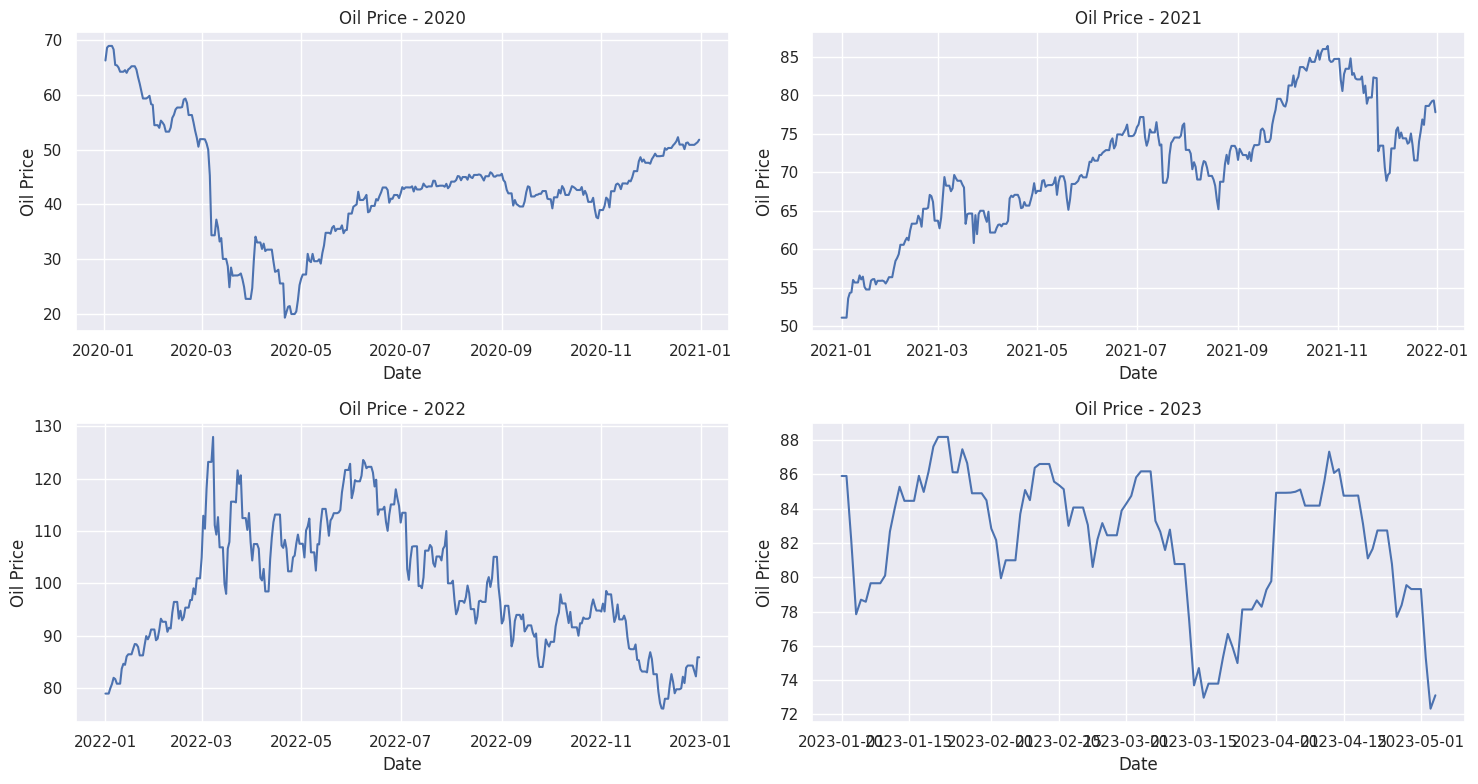

In [114]:
# Convert the "Date" column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the year from the "Date" column
data['Year'] = data['Date'].dt.year

# Group the data by year
grouped_data = data.groupby('Year')

# Calculate the number of rows and columns for subplots
num_years = len(grouped_data)
num_cols = 2  # Adjust the number of columns as per your preference
num_rows = (num_years + 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
axes = axes.flatten()

# Plotting oil price over time for each year
for i, (year, group) in enumerate(grouped_data):
    ax = axes[i]
    ax.plot(group['Date'], group['oil_PX_LAST'])
    ax.set_title(f"Oil Price - {year}")
    ax.set_xlabel('Date')
    ax.set_ylabel('Oil Price')
    ax.grid(True)

# Hide empty subplots if necessary
if num_years < num_rows * num_cols:
    for j in range(num_years, num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()

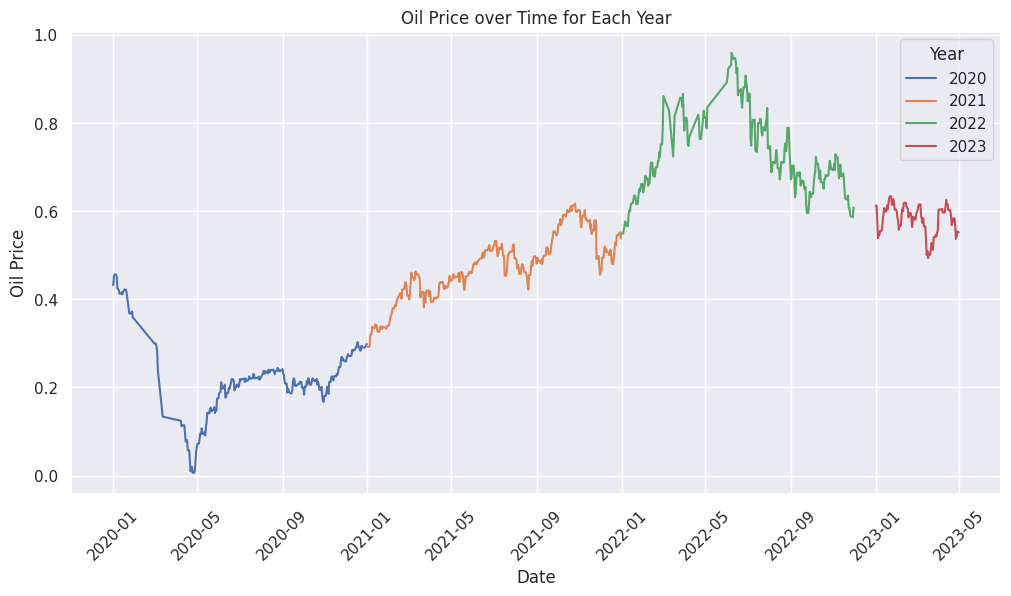

In [115]:
# Convert the "Date" column to datetime format
train['Date'] = pd.to_datetime(train['Date'])

# Extract the year from the "Date" column
train['Year'] = train['Date'].dt.year

# Group the train by year
grouped_train = train.groupby('Year')

# Plotting oil price over time for each year
plt.figure(figsize=(12, 6))
for year, group in grouped_train:
    plt.plot(group['Date'], group['oil_PX_LAST'], label=str(year))

plt.title('Oil Price over Time for Each Year')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


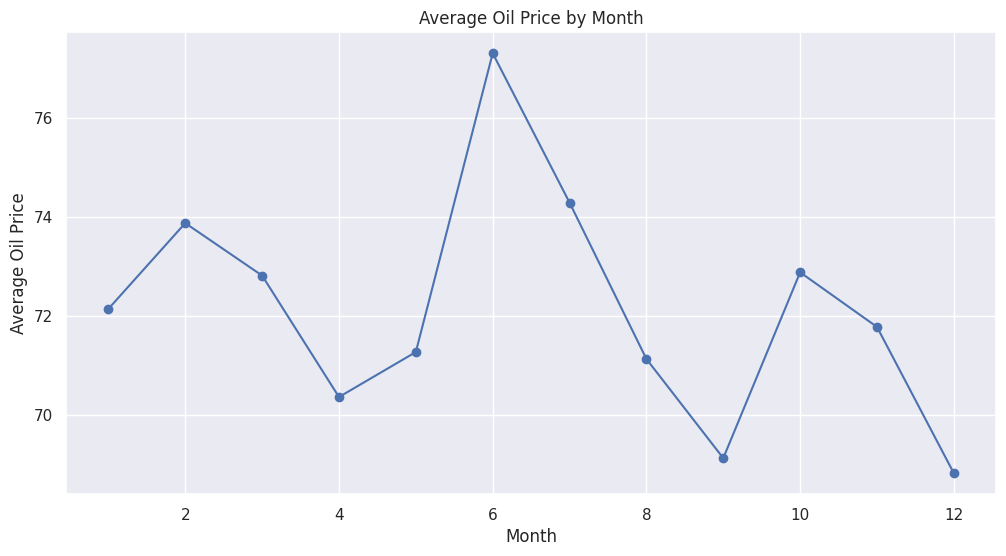

In [116]:
# Convert the "Date" column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the month from the "Date" column
data['Month'] = data['Date'].dt.month

# Calculate the average oil price for each month
average_prices = data.groupby('Month')['oil_PX_LAST'].mean()

# Plotting the average oil prices for each month
plt.figure(figsize=(12, 6))
plt.plot(average_prices.index, average_prices.values, marker='o', linestyle='-')
plt.title('Average Oil Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Oil Price')
plt.grid(True)
plt.show()

In [117]:
print(average_prices.values)
print(average_prices.values[5] - average_prices.values[11])
print(average_prices.values[5])

[72.14585366 73.87752212 72.8183871  70.36733333 71.27484536 77.30588889
 74.29096774 71.13494624 69.13333333 72.88408602 71.78177778 68.8283871 ]
8.477501792114694
77.30588888888889


Seasonal Demand: June is often associated with increased energy demand due to the onset of the summer season in many parts of the world. Higher demand for transportation fuels, including gasoline and jet fuel, during the vacation season can drive up oil prices.

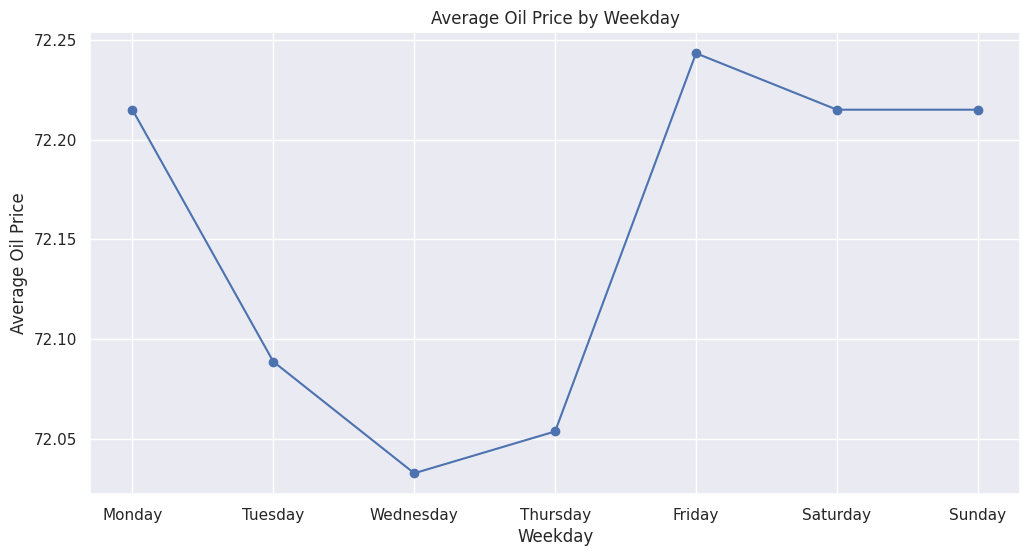

In [118]:
# Convert the "Date" column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the day of the week from the "Date" column (Monday=0, Sunday=6)
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Calculate the average oil price for each day of the week
average_prices = data.groupby('DayOfWeek')['oil_PX_LAST'].mean()

# Define the names of the weekdays for labeling the x-axis
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the average oil prices for each day of the week
plt.figure(figsize=(12, 6))
plt.plot(average_prices.index, average_prices.values, marker='o', linestyle='-')
plt.title('Average Oil Price by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Oil Price')
plt.xticks(range(7), weekday_names)
plt.grid(True)
plt.show()

In [119]:
print(average_prices.values[4] - average_prices.values[2])
print(average_prices.values[4])

0.21040229885058181
72.2432183908046


In [120]:
print(data)


           Date  Corn_PX_LAST  Corn_PX_VOLUME  dow_PX_LAST  dow_PX_VOLUME  \
0    2023-05-04        645.50           384.0          NaN            NaN   
1    2023-05-03        645.25          2081.0     33414.24     83019434.0   
2    2023-05-02        638.00          5508.0     33684.53     82082132.0   
3    2023-05-01        639.50          2753.0     34051.70     71349835.0   
4    2023-04-30        639.50          2753.0     34051.70     71349835.0   
...         ...           ...             ...          ...            ...   
1214 2020-01-06        384.75        112130.0     28703.38     79138409.0   
1215 2020-01-05        384.75        112130.0     28703.38     79138409.0   
1216 2020-01-04        384.75        112130.0     28703.38     79138409.0   
1217 2020-01-03        386.50        125931.0     28634.88     75068172.0   
1218 2020-01-02        391.50        103987.0     28868.80     73668133.0   

      EUR_PX_LAST  GAS_PX_LAST  GAS_PX_VOLUME  oil_PX_LAST  oil_PX_VOLUME  

NO monday effect

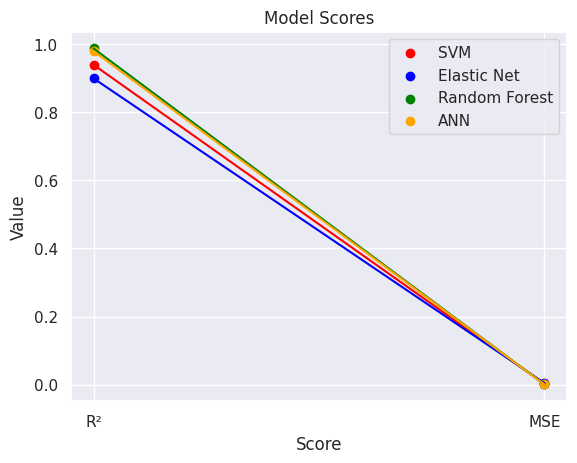

In [121]:
import matplotlib.pyplot as plt
import numpy as np

randomf_score = [0.988,0.0004]
elastic_score = [0.90, 0.004]
svm_score = [0.94, 0.0024]
ann_score = [0.98, 0.0004]

# Step 1: Create the lists of model names, scores, and colors
metrics_names = ['R²', 'MSE']
model_names = [ 'SVM',  'Elastic Net','Random Forest','ANN']
scores = [svm_score, elastic_score, randomf_score,  ann_score]
colors = ['red', 'blue', 'green', 'orange']

# Step 2: Create the scatter plot
for i in range(len(scores)):
  plt.scatter(range(2), scores[i], color=colors[i], label=model_names[i])

for i in range(len(scores)):
  plt.plot(range(2), scores[i], linestyle='-', color=colors[i])

# Step 4: Customize the plot
plt.xlabel('Score')
plt.ylabel('Value')
plt.title('Model Scores')
plt.xticks(range(2), ['R²', 'MSE'])
plt.legend()

# Step 5: Show the plot
plt.show()